In [124]:
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (20,10)
mpl.rcParams['axes.grid'] = False

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv")

In [3]:
print("Shape: ", df.shape)
df.head()

Shape:  (19735, 29)


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [5]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0682c3a090>,
      dtype=object)

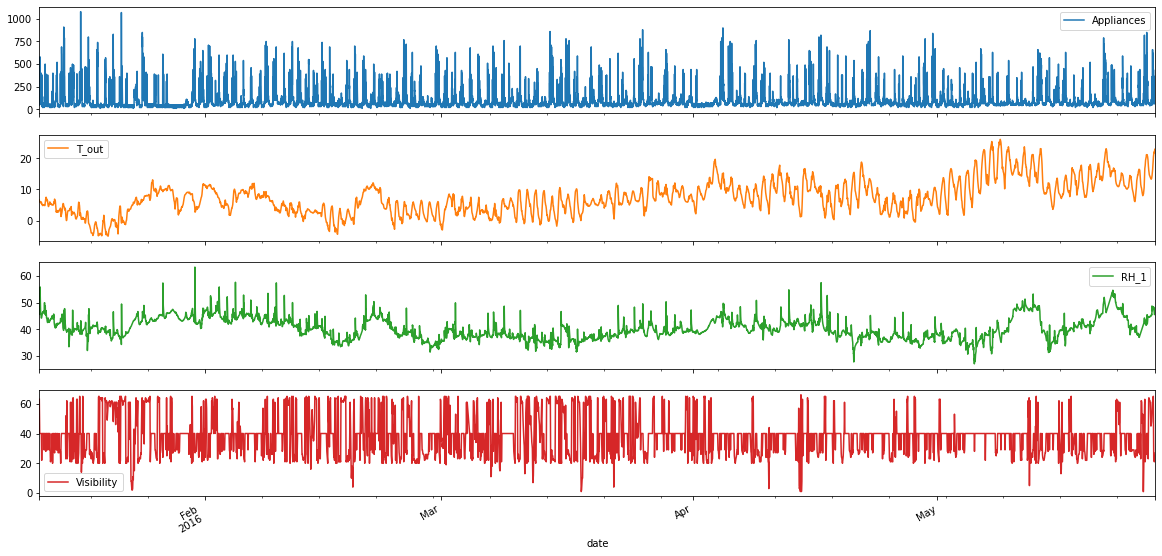

In [272]:
df.set_index('date')[['Appliances', 'T_out', 'RH_1', 'Visibility']].plot(subplots='True')

In [273]:
df_input = df[['Appliances', 'T_out', 'RH_1', 'Visibility']]

In [274]:
df_input.head()

,Appliances,T_out,RH_1,Visibility
0,60,6.600000,47.596667,63.000000
1,60,6.483333,46.693333,59.166667
2,50,6.366667,46.300000,55.333333
3,50,6.250000,46.066667,51.500000
4,60,6.133333,46.333333,47.666667


In [275]:
df_input.describe()

,Appliances,T_out,RH_1,Visibility
count,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,7.411665,40.259739,38.330834
std,102.524891,5.317409,3.979299,11.794719
min,10.000000,-5.000000,27.023333,1.000000
25%,50.000000,3.666667,37.333333,29.000000
50%,60.000000,6.916667,39.656667,40.000000
75%,100.000000,10.408333,43.066667,40.000000
max,1080.000000,26.100000,63.360000,66.000000


In [276]:
df_input.query("Appliances > 100")

,Appliances,T_out,RH_1,Visibility
10,230,5.966667,45.863333,40.000000
11,580,5.983333,46.396667,40.000000
12,430,6.000000,48.000000,40.000000
13,250,6.000000,52.726667,40.000000
19,140,6.000000,49.800000,40.000000
...,...,...,...,...
19727,120,22.966667,47.456667,22.166667
19728,110,23.000000,47.193333,22.000000
19732,270,22.466667,46.596667,25.333333
19733,420,22.333333,46.990000,26.166667


In [277]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)

In [278]:
data_scaled

array([[0.04672897, 0.37299035, 0.56618659, 0.95384615],
       [0.04672897, 0.36923901, 0.54132648, 0.89487179],
       [0.03738318, 0.36548767, 0.53050179, 0.83589744],
       ...,
       [0.24299065, 0.88317256, 0.53866618, 0.37435897],
       [0.38317757, 0.87888532, 0.54949087, 0.38717949],
       [0.39252336, 0.87459807, 0.53875791, 0.4       ]])

In [279]:
features = data_scaled
target = data_scaled[:, 0]

In [280]:
TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)[0]

(array([[[0.04672897, 0.37299035, 0.56618659, 0.95384615],
         [0.04672897, 0.36923901, 0.54132648, 0.89487179]]]),
 array([0.03738318]))

In [281]:
x_train_val, x_test, y_train_val, y_test = train_test_split(features, target, test_size=0.1, random_state=123, shuffle = False)

In [282]:
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.11, random_state=123, shuffle = False)

In [283]:
print("Train Shape: {}".format(x_train.shape))
print("Validation Shape: {}".format(x_val.shape))
print("Test Shape: {}".format(x_test.shape))

Train Shape: (15807, 4)
Validation Shape: (1954, 4)
Test Shape: (1974, 4)


**Hyper params**


In [284]:
DAYS = 4
WIN_LENGTH = int(6 * 24 * DAYS)
BATCH_SIZE = 32
NUM_FEATURES = 6

In [285]:
train_generator = TimeseriesGenerator(x_train, y_train, length = WIN_LENGTH, sampling_rate = 1, batch_size = BATCH_SIZE)
val_generator = TimeseriesGenerator(x_val, y_val, length = WIN_LENGTH, sampling_rate = 1, batch_size = BATCH_SIZE)
test_generator = TimeseriesGenerator(x_test, y_test, length = WIN_LENGTH, sampling_rate = 1, batch_size = BATCH_SIZE)

In [286]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(WIN_LENGTH, NUM_FEATURES), return_sequences=True),
    tf.keras.layers.LeakyReLU(alpha=0.5),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LeakyReLU(alpha=0.5),
    tf.keras.layers.Dropout(0.3), 
    tf.keras.layers.LSTM(128, return_sequences=False),
    tf.keras.layers.Dropout(0.3), 
    tf.keras.layers.Dense(1)
])

In [287]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_45 (LSTM)               (None, 576, 128)          69120     
_________________________________________________________________
leaky_re_lu_28 (LeakyReLU)   (None, 576, 128)          0         
_________________________________________________________________
lstm_46 (LSTM)               (None, 576, 128)          131584    
_________________________________________________________________
leaky_re_lu_29 (LeakyReLU)   (None, 576, 128)          0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 576, 128)          0         
_________________________________________________________________
lstm_47 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dropout_31 (Dropout)         (None, 128)             

In [288]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience =2, mode = 'min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer='adam',
              metrics=[tf.metrics.MeanAbsoluteError()]
             )

In [289]:
history = model.fit_generator(train_generator, epochs=50, 
                             validation_data=val_generator, 
                             shuffle=False,
                             callbacks=[early_stopping])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
476/476 [==============================] - 43s 84ms/step - loss: 0.0113 - mean_absolute_error: 0.0624 - val_loss: 0.0058 - val_mean_absolute_error: 0.0587
Epoch 2/50
476/476 [==============================] - 39s 82ms/step - loss: 0.0071 - mean_absolute_error: 0.0453 - val_loss: 0.0034 - val_mean_absolute_error: 0.0380
Epoch 3/50
476/476 [==============================] - 39s 82ms/step - loss: 0.0047 - mean_absolute_error: 0.0345 - val_loss: 0.0035 - val_mean_absolute_error: 0.0392
Epoch 4/50
476/476 [==============================] - 39s 82ms/step - loss: 0.0045 - mean_absolute_error: 0.0338 - val_loss: 0.0032 - val_mean_absolute_error: 0.0344
Epoch 5/50
476/476 [==============================] - 39s 82ms/step - loss: 0.0045 - mean_absolute_error: 0.0339 - val_loss: 0.0032 - val_mean_absolute_error: 0.0342
Epoch 6/50
476/476 [==============================] - 39s 82ms/step - loss: 0.0044 - mean_absolute_error: 0.0333 - val_loss: 0.0032 - val_mean_absolute_error: 0.0337


In [290]:
model.evaluate(test_generator, verbose=0)

[0.003538039978593588, 0.03159013018012047]

In [291]:
predictions = model.predict_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [292]:
predictions

array([[0.05445978],
       [0.04569276],
       [0.06604556],
       ...,
       [0.10275303],
       [0.26308754],
       [0.27945748]], dtype=float32)

In [293]:
predictions_list = []
for p in predictions:
    val = p[0]
    predictions_list.append(val)

In [294]:
predictions = pd.Series(predictions_list)
actual = pd.Series(y_test)

In [295]:
actual = actual.tail(predictions.shape[0])
actual = actual.reset_index()[0]

In [296]:
comp = pd.concat([actual, predictions], axis = 1)
comp.columns=['Actual', "Predicted"]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0681854fd0>,
      dtype=object)

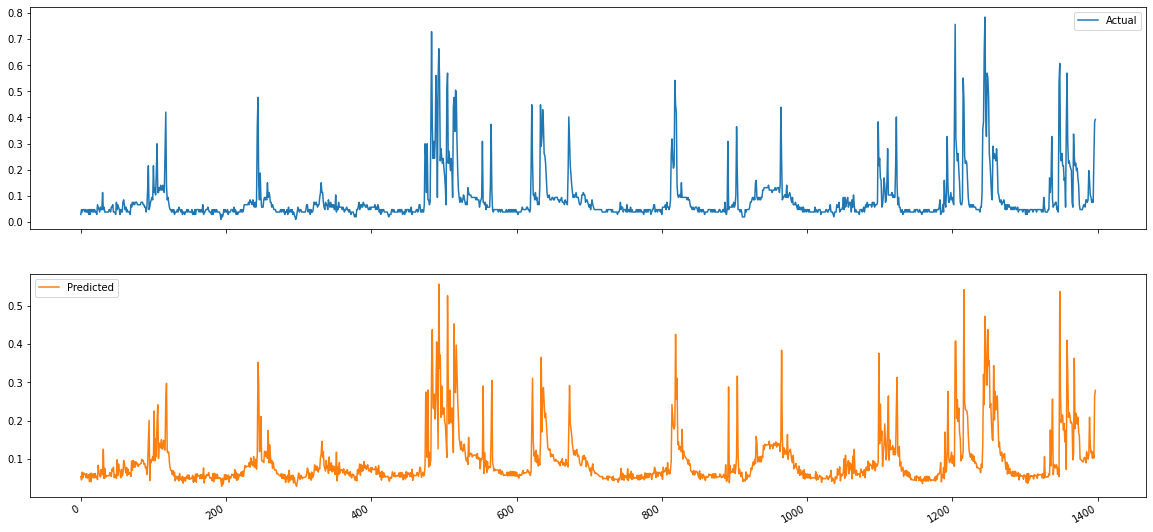

In [297]:
comp[['Actual', 'Predicted']].plot(subplots=True)

## Seems to have some issues with spike days. Maybe there is more information we can use to account for this? 